In [60]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
# set column width to 1000
pd.set_option('display.max_colwidth', 100)
import requests
import concurrent.futures
from datetime import datetime
from tqdm import tqdm
import shapely.geometry
import geopandas as gpd
from arcgis.gis import GIS
from arcgis.features import FeatureLayerCollection

import matplotlib.pyplot as plt
# set figsize
plt.rcParams['figure.figsize'] = [10, 10]

In [2]:
# Projected Coordinate System (PCS): how you project onto a 2D plane
epsg_2d = 26717 
# Toronto Police Service Open Data includes geographic location information provided in
# the projected coordinate system NAD 1927 UTM 17N
# https://epsg.io/26717

# Geographic Coordinate System (GCS): how coordinates are represented in a 3D space
# World Geodetic System 1984 (WGS84)
# https://epsg.io/4326
epsg_3d = 4326 

# Initiate GIS session

In [72]:
# class to get item from gis connection
class gis_item():

    # get the item and layer given item_id
    def __init__(self, gis_session, item_id):
        """_summary_: This function returns a GIS item object.

        Args:
            item_id (str): The item id of the GIS item to use.
        """
        gis = gis_session
        self.item = gis.content.get(item_id)
        try:
            self.layer = self.item.layers[0]
        except:
            self.layer = self.item.tables[0]
        
        
    # get query result given where and out_fields statement    
    
    def query_method(self, out_fields = '*', where=None):
        """_summary_: This function returns a GIS query result in the format of pandas df.

        Returns:
            _type_: A pandas df.
        """
        if where is None:
            self.query = self.layer.query(out_fields = out_fields,
                                          return_geometry = True,
                                          # return as pandas df
                                          as_df = False,
                                          # to get lat and long
                                          out_sr = epsg_3d) 
        else:
            self.query = self.layer.query(where = where,
                                          out_fields = out_fields,
                                          return_geometry = True,
                                          as_df = False,
                                          out_sr = epsg_3d)
        return self.query

In [73]:
my_gis = GIS()

# Item ID for datasets
- Crime https://data.torontopolice.on.ca/datasets/TorontoPS::major-crime-indicators-open-data/about
- Traffic Collisions https://data.torontopolice.on.ca/datasets/TorontoPS::traffic-collisions-asr-t-tbl-001/about
- Shootings https://data.torontopolice.on.ca/datasets/TorontoPS::shooting-and-firearm-discharges-open-data/about
- Homicide https://data.torontopolice.on.ca/datasets/TorontoPS::homicides-open-data-asr-rc-tbl-002/about
- Persons in Crisis Calls for Service Attended https://data.torontopolice.on.ca/datasets/TorontoPS::persons-in-crisis-calls-for-service-attended-open-data/about
- Mental Health Act Apprehensions https://data.torontopolice.on.ca/datasets/TorontoPS::mental-health-act-apprehensions-open-data/about

In [74]:
# name of dataset to query from Toronto Police Service API
item_ids = {
    'mci_crimes' : '0a239a5563a344a3bbf8452504ed8d68',
    'traffic_collisions' : '004af649bcfa4575b480b2636704695f',
    'shootings' : '64ddeca12da34403869968ec725e23c4',
    'homicide' : 'd96bf5b67c1c49879f354dad51cf81f9',
    'pic_calls' : '79c8e950bfe54ce39334ba108e1b325f',
    'mha_apprehensions' : '333c4e1c96314741a83425045b6a7642',
    'neighbourhoods' : 'ea0cfecdb1de416884e6b0bf08a9e195',
}

In [82]:
query_set = {}

In [83]:
query_set['mci_crimes'] = gis_item(my_gis, item_ids['mci_crimes']).query_method()

In [84]:
query_set['traffic_collisions'] = gis_item(my_gis, item_ids['traffic_collisions']).query_method()

In [85]:
query_set['shootings'] = gis_item(my_gis, item_ids['shootings']).query_method()

In [86]:
query_set['homicide'] = gis_item(my_gis, item_ids['homicide']).query_method()

In [87]:
query_set['pic_calls'] = gis_item(my_gis, item_ids['pic_calls']).query_method()

In [88]:
query_set['mha_apprehensions'] = gis_item(my_gis, item_ids['mha_apprehensions']).query_method()

In [89]:
query_set['neighbourhoods'] = gis_item(my_gis, item_ids['neighbourhoods']).query_method()

# Spatial DataFrames

In [162]:
result_set = {key: value.sdf for key, value in query_set.items()}

c:\Users\willi\anaconda3\envs\toronto_realestate\lib\site-packages\arcgis\features\geo\_io\serviceops.py:119: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[fld] = pd.to_datetime(
c:\Users\willi\anaconda3\envs\toronto_realestate\lib\site-packages\arcgis\features\geo\_io\serviceops.py:119: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[fld] = pd.to_datetime(
c:\Users\willi\anaconda3\envs\toronto_realestate\lib\site-packages\arcgis\features\geo\_io\serviceops.py:119: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a

## mci_crimes

In [163]:
result_set['mci_crimes'][[
    'EVENT_UNIQUE_ID',
    'OCC_DATE', 'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR',
    'LOCATION_TYPE', 'PREMISES_TYPE',
    'HOOD_158', 'NEIGHBOURHOOD_158', 'DIVISION',
    'MCI_CATEGORY', 'OFFENCE',
    'LONG_WGS84', 'LAT_WGS84', 'SHAPE'
]]

,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,OCC_DOW,OCC_HOUR,LOCATION_TYPE,PREMISES_TYPE,HOOD_158,NEIGHBOURHOOD_158,DIVISION,MCI_CATEGORY,OFFENCE,LONG_WGS84,LAT_WGS84,SHAPE
0,GO-20141262074,1998-06-01 04:00:00,<NA>,<NA>,<NA>,<NA>,<NA>,12.0,"Apartment (Rooming House, Condo)",Apartment,38,Lansing-Westgate,D32,Assault,Administering Noxious Thing,-79.425896,43.757346,"{""x"": -79.42589622899999, ""y"": 43.75734618900003, ""spatialReference"": {""wkid"": 4326, ""latestWkid..."
1,GO-20141260701,2014-01-01 05:00:00,2014.0,January,1.0,1.0,Wednesday,3.0,"Commercial Dwelling Unit (Hotel, Motel, B & B, Short Term Rental)",Commercial,70,South Riverdale,D51,Break and Enter,B&E,-79.350229,43.646293,"{""x"": -79.35022941499994, ""y"": 43.64629318300007, ""spatialReference"": {""wkid"": 4326, ""latestWkid..."
2,GO-20141260889,2014-01-01 05:00:00,2014.0,January,1.0,1.0,Wednesday,4.0,"Apartment (Rooming House, Condo)",Apartment,74,North St.James Town,D51,Assault,Assault,-79.376497,43.666423,"{""x"": -79.37649725599994, ""y"": 43.66642273200006, ""spatialReference"": {""wkid"": 4326, ""latestWkid..."
3,GO-20141260973,2014-01-01 05:00:00,2014.0,January,1.0,1.0,Wednesday,4.0,"Streets, Roads, Highways (Bicycle Path, Private Road)",Outside,NSA,NSA,NSA,Theft Over,Theft Over,-85.488744,0.0,"{""x"": -85.48874388499996, ""y"": 5.684341886080802e-14, ""spatialReference"": {""wkid"": 4326, ""latest..."
4,GO-20141261050,2014-01-01 05:00:00,2014.0,January,1.0,1.0,Wednesday,4.0,"Streets, Roads, Highways (Bicycle Path, Private Road)",Outside,69,Blake-Jones,D54,Assault,Assault,-79.344839,43.678946,"{""x"": -79.34483922399994, ""y"": 43.67894585300007, ""spatialReference"": {""wkid"": 4326, ""latestWkid..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323291,GO-20222554300,2022-12-22 05:00:00,2022.0,December,22.0,356.0,Thursday,8.0,"Single Home, House (Attach Garage, Cottage, Mobile)",House,119,Wexford/Maryvale,D41,Break and Enter,B&E W'Intent,-79.30174,43.736102,"{""x"": -79.30173989899998, ""y"": 43.736102223000046, ""spatialReference"": {""wkid"": 4326, ""latestWki..."
323292,GO-20222557893,2022-12-31 05:00:00,2022.0,December,31.0,365.0,Saturday,3.0,"Other Commercial / Corporate Places (For Profit, Warehouse, Corp. Bldg",Commercial,130,Milliken,D42,Break and Enter,B&E,-79.258639,43.828794,"{""x"": -79.25863938999998, ""y"": 43.82879350700006, ""spatialReference"": {""wkid"": 4326, ""latestWkid..."
323293,GO-20222559486,2022-12-22 05:00:00,2022.0,December,22.0,356.0,Thursday,16.0,"Apartment (Rooming House, Condo)",Apartment,102,Forest Hill North,D53,Assault,Assault,-79.425645,43.701404,"{""x"": -79.42564498999997, ""y"": 43.70140385700006, ""spatialReference"": {""wkid"": 4326, ""latestWkid..."
323294,GO-20222557956,2022-12-31 05:00:00,2022.0,December,31.0,365.0,Saturday,4.0,Convenience Stores,Commercial,98,Rosedale-Moore Park,D53,Assault,Assault,-79.38517,43.672134,"{""x"": -79.38517046199996, ""y"": 43.67213389700004, ""spatialReference"": {""wkid"": 4326, ""latestWkid..."


## traffic_collisions

In [112]:
result_set['traffic_collisions'][[
    'EventUniqueId',
    'OccurrenceDate', 'Year', 'Month', 'Day_of_Week', 'Hour', # 'OCC_DAY', 'OCC_DOY', 
    'Atom', 'Neighbourhood', 'Division',
    'Fatalities', 'Injury_Collisions', 'FTR_Collisions', 'PD_Collisions',
    'Longitude', 'Latitude', 'SHAPE'    
]]

,EventUniqueId,OccurrenceDate,Year,Month,Day_of_Week,Hour,Atom,Neighbourhood,Division,Fatalities,Injury_Collisions,FTR_Collisions,PD_Collisions,Longitude,Latitude,SHAPE
0,GO-20148000204,2014-01-03 05:00:00,2014,January,Friday,8,NSA,NSA,NSA,0,NO,NO,YES,0.0,0.0,"{""x"": 0, ""y"": 0, ""spatialReference"": {""wkid"": 4326, ""latestWkid"": 4326}}"
1,GO-20148000205,2014-01-03 05:00:00,2014,January,Friday,12,68,North Riverdale (68),D54/D55,0,NO,NO,YES,-79.353893,43.670491,"{""x"": -79.35389301999999, ""y"": 43.67049061, ""spatialReference"": {""wkid"": 4326, ""latestWkid"": 4326}}"
2,GO-20148000206,2014-01-03 05:00:00,2014,January,Friday,8,NSA,NSA,NSA,0,NO,NO,YES,0.0,0.0,"{""x"": 0, ""y"": 0, ""spatialReference"": {""wkid"": 4326, ""latestWkid"": 4326}}"
3,GO-20148000208,2014-01-03 05:00:00,2014,January,Friday,11,79,University (79),D52,0,NO,NO,YES,-79.40207,43.663052,"{""x"": -79.40207036, ""y"": 43.66305190999999, ""spatialReference"": {""wkid"": 4326, ""latestWkid"": 4326}}"
4,GO-20148000209,2014-01-03 05:00:00,2014,January,Friday,13,50,Newtonbrook East (50),D32,0,NO,NO,YES,-79.420043,43.798,"{""x"": -79.42004278, ""y"": 43.79800044, ""spatialReference"": {""wkid"": 4326, ""latestWkid"": 4326}}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553775,GO-20228022848,2022-06-27 04:00:00,2022,June,Monday,17,126,Dorset Park (126),D41,0,NO,NO,YES,-79.284796,43.747518,"{""x"": -79.28479620000002, ""y"": 43.7475181, ""spatialReference"": {""wkid"": 4326, ""latestWkid"": 4326}}"
553776,GO-20228022849,2022-06-27 04:00:00,2022,June,Monday,7,92,Corso Italia-Davenport (92),D13,0,YES,NO,NO,-79.443043,43.677962,"{""x"": -79.44304265, ""y"": 43.677961610000004, ""spatialReference"": {""wkid"": 4326, ""latestWkid"": 43..."
553777,GO-20228022856,2022-06-27 04:00:00,2022,June,Monday,23,123,Cliffcrest (123),D41,0,NO,NO,YES,-79.235346,43.707215,"{""x"": -79.23534638, ""y"": 43.707214609999994, ""spatialReference"": {""wkid"": 4326, ""latestWkid"": 43..."
553778,GO-20228022858,2022-06-27 04:00:00,2022,June,Monday,18,99,Mount Pleasant East (99),D53,0,NO,NO,YES,-79.376298,43.708705,"{""x"": -79.37629782, ""y"": 43.70870522999999, ""spatialReference"": {""wkid"": 4326, ""latestWkid"": 4326}}"


## shootings

In [116]:
result_set['shootings'][[
    'EVENT_UNIQUE_ID',
    'OCC_DATE', 'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR',
    'HOOD_158', 'NEIGHBOURHOOD_158', 'DIVISION',
    'DEATH', 'INJURIES',
    'LONG_WGS84', 'LAT_WGS84', 'SHAPE'
]]

,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,OCC_DOW,OCC_HOUR,HOOD_158,NEIGHBOURHOOD_158,DIVISION,DEATH,INJURIES,LONG_WGS84,LAT_WGS84,SHAPE
0,GO-2004397105,2004-05-15 04:00:00,2004.0,May,15.0,136.0,Saturday,1.0,142,Woburn North,D41,0.0,0.0,-79.234955,43.781528,"{""x"": -79.23495526399995, ""y"": 43.78152799000003, ""spatialReference"": {""wkid"": 4326, ""latestWkid..."
1,GO-2004600109,2004-07-26 04:00:00,2004.0,July,26.0,208.0,Monday,23.0,1,West Humber-Clairville,D23,0.0,0.0,-79.618218,43.733547,"{""x"": -79.61821818799996, ""y"": 43.733546887000045, ""spatialReference"": {""wkid"": 4326, ""latestWki..."
2,GO-2004311851,2004-05-14 04:00:00,2004.0,May,14.0,135.0,Friday,16.0,24,Black Creek,D31,1.0,1.0,-79.518759,43.769157,"{""x"": -79.51875892699996, ""y"": 43.76915718500004, ""spatialReference"": {""wkid"": 4326, ""latestWkid..."
3,GO-2004736004,2004-12-19 05:00:00,2004.0,December,19.0,354.0,Sunday,0.0,168,Downtown Yonge East,D51,1.0,0.0,-79.37887,43.660665,"{""x"": -79.37886979699994, ""y"": 43.66066473300003, ""spatialReference"": {""wkid"": 4326, ""latestWkid..."
4,GO-2004303455,2004-04-12 04:00:00,2004.0,April,12.0,103.0,Monday,22.0,146,Malvern East,D42,0.0,0.0,-79.212435,43.812075,"{""x"": -79.21243507299994, ""y"": 43.812075134000054, ""spatialReference"": {""wkid"": 4326, ""latestWki..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,GO-20221038418,2022-06-02 04:00:00,2022.0,June,2.0,153.0,Thursday,3.0,53,Henry Farm,D33,0.0,1.0,-79.362941,43.771764,"{""x"": -79.36294050699996, ""y"": 43.771763803000056, ""spatialReference"": {""wkid"": 4326, ""latestWki..."
5703,GO-20221362949,2022-07-17 04:00:00,2022.0,July,17.0,198.0,Sunday,3.0,164,Wellington Place,D14,1.0,1.0,-79.402702,43.64392,"{""x"": -79.40270187799996, ""y"": 43.643920112000046, ""spatialReference"": {""wkid"": 4326, ""latestWki..."
5704,GO-2022336423,2022-02-21 05:00:00,2022.0,February,21.0,52.0,Monday,5.0,135,Morningside,D43,0.0,0.0,-79.196217,43.786621,"{""x"": -79.19621683099996, ""y"": 43.78662070200005, ""spatialReference"": {""wkid"": 4326, ""latestWkid..."
5705,GO-20221765442,2022-09-11 04:00:00,2022.0,September,11.0,254.0,Sunday,1.0,83,Dufferin Grove,D11,0.0,2.0,-79.443993,43.658083,"{""x"": -79.44399320399998, ""y"": 43.65808349800005, ""spatialReference"": {""wkid"": 4326, ""latestWkid..."


## homicide

In [120]:
result_set['homicide'][[
    'EVENT_UNIQUE_ID',
    'OCC_DATE', 'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW',
    'HOOD_158', 'NEIGHBOURHOOD_158', 'DIVISION',
    'HOMICIDE_TYPE',
    'LONG_WGS84', 'LAT_WGS84', 'SHAPE'
]]

,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOY,OCC_DOW,HOOD_158,NEIGHBOURHOOD_158,DIVISION,HOMICIDE_TYPE,LONG_WGS84,LAT_WGS84,SHAPE
0,GO-2004111878,2004.01.03,2004.0,January,3.0,3.0,Saturday,98,Rosedale-Moore Park,D53,Other,-79.392851,43.68502,"{""x"": -79.39285059999997, ""y"": 43.68501978000006, ""spatialReference"": {""wkid"": 4326, ""latestWkid..."
1,GO-2004125755,2004.01.08,2004.0,January,8.0,8.0,Thursday,142,Woburn North,D42,Shooting,-79.233887,43.781741,"{""x"": -79.23388714999999, ""y"": 43.781740540000044, ""spatialReference"": {""wkid"": 4326, ""latestWki..."
2,GO-2004136086,2004.01.08,2004.0,January,8.0,8.0,Thursday,146,Malvern East,D42,Shooting,-79.206894,43.810849,"{""x"": -79.20689373999994, ""y"": 43.81084933000005, ""spatialReference"": {""wkid"": 4326, ""latestWkid..."
3,GO-2004148623,2004.01.25,2004.0,January,25.0,25.0,Sunday,171,Junction-Wallace Emerson,D13,Shooting,-79.434396,43.670466,"{""x"": -79.43439589999997, ""y"": 43.670465560000025, ""spatialReference"": {""wkid"": 4326, ""latestWki..."
4,GO-2004148619,2004.01.25,2004.0,January,25.0,25.0,Sunday,144,Morningside Heights,D42,Shooting,-79.203862,43.823535,"{""x"": -79.20386232999994, ""y"": 43.823535410000034, ""spatialReference"": {""wkid"": 4326, ""latestWki..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1317,GO-20222396611,2022.12.08,2022.0,December,8.0,342.0,Thursday,88,High Park North,D11,Stabbing,-79.468219,43.656326,"{""x"": -79.46821932999995, ""y"": 43.65632622000004, ""spatialReference"": {""wkid"": 4326, ""latestWkid..."
1318,GO-20222413771,2022.12.10,2022.0,December,10.0,344.0,Saturday,61,Taylor-Massey,D54,Shooting,-79.292176,43.696072,"{""x"": -79.29217554999997, ""y"": 43.69607151000008, ""spatialReference"": {""wkid"": 4326, ""latestWkid..."
1319,GO-20222452652,2022.12.16,2022.0,December,16.0,350.0,Friday,135,Morningside,D43,Shooting,-79.205111,43.765038,"{""x"": -79.20511141999998, ""y"": 43.76503825000003, ""spatialReference"": {""wkid"": 4326, ""latestWkid..."
1320,GO-20222467066,2022.12.18,2022.0,December,18.0,352.0,Sunday,170,Yonge-Bay Corridor,D52,Stabbing,-79.382467,43.645286,"{""x"": -79.38246742999996, ""y"": 43.645286060000046, ""spatialReference"": {""wkid"": 4326, ""latestWki..."


## pic_calls

In [122]:
result_set['pic_calls'][[
    'EVENT_ID',
    'EVENT_DATE', 'EVENT_YEAR', 'EVENT_MONTH', 'EVENT_DOW', 'EVENT_HOUR',
    'HOOD_158', 'NEIGHBOURHOOD_158', 'DIVISION',
    'OCCURRENCE_CREATED', 'APPREHENSION_MADE'
]]

,EVENT_ID,EVENT_DATE,EVENT_YEAR,EVENT_MONTH,EVENT_DOW,EVENT_HOUR,HOOD_158,NEIGHBOURHOOD_158,DIVISION,OCCURRENCE_CREATED,APPREHENSION_MADE
0,1253013.0,2014-01-01 05:00:00,2014.0,January,Wednesday,0.0,88,High Park North,D11,No,No
1,1253185.0,2014-01-01 05:00:00,2014.0,January,Wednesday,0.0,7,Willowridge-Martingrove-Richview,D23,Yes,Yes
2,1253198.0,2014-01-01 05:00:00,2014.0,January,Wednesday,1.0,95,Annex,D53,No,No
3,1253204.0,2014-01-01 05:00:00,2014.0,January,Wednesday,1.0,73,Moss Park,D51,No,No
4,1253227.0,2014-01-01 05:00:00,2014.0,January,Wednesday,1.0,37,Willowdale West,D32,No,No
...,...,...,...,...,...,...,...,...,...,...,...
259945,22652547.0,2022-12-31 05:00:00,2022.0,12,7,8.0,111,Rockcliffe-Smythe,D12,Yes,Yes
259946,22657587.0,2022-12-31 05:00:00,2022.0,12,7,22.0,166,St Lawrence-East Bayfront-The Islands,D51,No,No
259947,22654517.0,2022-12-31 05:00:00,2022.0,12,7,14.0,123,Cliffcrest,D43,Yes,Yes
259948,22657072.0,2022-12-31 05:00:00,2022.0,12,7,21.0,121,Oakridge,D41,Yes,No


## mha_apprehensions

In [124]:
result_set['mha_apprehensions'][[
    'EVENT_UNIQUE_ID',
    'OCC_DATE', 'OCC_YEAR', 'OCC_MONTH', 'OCC_DOY', 'OCC_DAY', 'OCC_DOW', 'OCC_HOUR',
    'HOOD_158', 'NEIGHBOURHOOD_158', 'DIVISION',
    'PREMISES_TYPE', 'APPREHENSION_TYPE',
    'SEX', 'AGE_COHORT'
]]

,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DOY,OCC_DAY,OCC_DOW,OCC_HOUR,HOOD_158,NEIGHBOURHOOD_158,DIVISION,PREMISES_TYPE,APPREHENSION_TYPE,SEX,AGE_COHORT
0,GO-20141262056,2014-01-01 05:00:00,2014.0,January,1.0,1.0,Wednesday,11.0,92,Corso Italia-Davenport,D13,House,Mha Sec 17 (Power Of App),Male,25 to 34
1,GO-20141264269,2014-01-01 05:00:00,2014.0,January,1.0,1.0,Wednesday,21.0,154,Oakdale-Beverley Heights,D31,Apartment,Mha Sec 17 (Power Of App),Male,25 to 34
2,GO-20141263132,2014-01-01 05:00:00,2014.0,January,1.0,1.0,Wednesday,16.0,5,Elms-Old Rexdale,D23,Apartment,Mha Sec 16 (Form 2),Female,25 to 34
3,GO-20141263993,2014-01-01 05:00:00,2014.0,January,1.0,1.0,Wednesday,19.0,115,Mount Dennis,D12,Apartment,Mha Sec 17 (Power Of App),Male,18 to 24
4,GO-20141260625,2014-01-01 05:00:00,2014.0,January,1.0,1.0,Wednesday,2.0,55,Thorncliffe Park,D53,Outside,Mha Sec 17 (Power Of App),Male,35 to 44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93940,GO-20222560016,2022-12-31 05:00:00,2022.0,December,365.0,31.0,Saturday,12.0,153,Avondale,D32,Apartment,Mha Sec 17 (Power Of App),Male,35 to 44
93941,GO-20222563183,2022-12-31 05:00:00,2022.0,December,365.0,31.0,Saturday,20.0,74,North St.James Town,D51,Apartment,Mha Sec 17 (Power Of App),Female,18 to 24
93942,GO-20222564088,2022-12-31 05:00:00,2022.0,December,365.0,31.0,Saturday,23.0,169,Bay-Cloverhill,D52,Apartment,Mha Sec 17 (Power Of App),Female,25 to 34
93943,GO-20222558514,2022-12-31 05:00:00,2022.0,December,365.0,31.0,Saturday,7.0,149,Parkwoods-O'Connor Hills,D33,House,Mha Sec 17 (Power Of App),Female,55 to 64


## neighbourhoods

<Axes: >

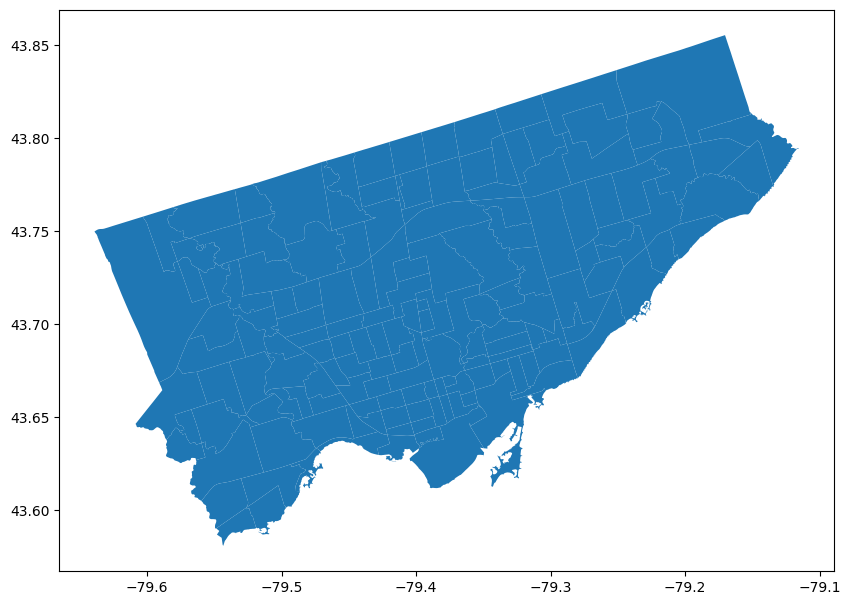

In [145]:
result_set['neighbourhoods'] = gpd.GeoDataFrame(
    result_set['neighbourhoods'], 
    crs='epsg:' + str(epsg_3d), 
    geometry='SHAPE')

result_set['neighbourhoods'].plot()

# Clean df

In [164]:
def clean_columns(df):        
    try:
        df.rename(columns = {
            'EVENT_ID': 'EVENT_UNIQUE_ID',
            'EventUniqueId': 'EVENT_UNIQUE_ID',
            
            'OccurrenceDate': 'OCC_DATE',
            'Year': 'OCC_YEAR', 
            'Month': 'OCC_MONTH', 
            'Day_of_Week': 'OCC_DOW',
            'Hour': 'OCC_HOUR',
            'EVENT_DATE': 'OCC_DATE', 
            'EVENT_YEAR': 'OCC_YEAR', 
            'EVENT_MONTH': 'OCC_MONTH',
            'EVENT_DOW': 'OCC_DOW',
            'EVENT_HOUR': 'OCC_HOUR',
            
            'Atom': 'HOOD_158',
            'Neighbourhood' : 'NEIGHBOURHOOD_158',
            'Division': 'DIVISION',
            'AREA_NAME': 'NEIGHBOURHOOD_158',

            'LONG_WGS84': 'LONGITUDE',
            'LAT_WGS84': 'LATITUDE',
            'Longitude': 'LONGITUDE',
            'Latitude': 'LATITUDE',
            }, inplace = True)
    except:
        pass        
    
    return df

In [165]:
for key in result_set:
    result_set[key] = clean_columns(result_set[key])

# Write to raw_data folder

In [166]:
result_set.keys()

dict_keys(['mci_crimes', 'traffic_collisions', 'shootings', 'homicide', 'pic_calls', 'mha_apprehensions', 'neighbourhoods'])

In [161]:
result_set['mci_crimes'].to_parquet('../data/raw/mci_crimes.parquet')
result_set['traffic_collisions'].to_parquet('../data/raw/traffic_collisions.parquet')
result_set['shootings'].to_parquet('../data/raw/shootings.parquet')
result_set['homicide'].to_parquet('../data/raw/homicide.parquet')
result_set['pic_calls'].to_parquet('../data/raw/pic_calls.parquet')
result_set['mha_apprehensions'].to_parquet('../data/raw/mha_apprehensions.parquet')

In [143]:
# result_set['mci_crimes'].to_csv('../data/raw/Major_Crime_Indicators.csv', index = False)
# result_set['traffic_collisions'].to_csv('../data/raw/Traffic_Collisions.csv', index = False)
# result_set['shootings'].to_csv('../data/raw/Shootings.csv', index = False)
# result_set['homicide'].to_csv('../data/raw/Homicide.csv', index = False)
# result_set['pic_calls'].to_csv('../data/raw/Persons_in_Crisis_Calls_for_Service_Attended.csv', index = False)
# result_set['mha_apprehensions'].to_csv('../data/raw/Mental_Health_Act_Apprehensions.csv', index = False)

In [152]:
# convert all float64 columns to float32
result_set['neighbourhoods'] = result_set['neighbourhoods'].astype({col: 'float32' for col in result_set['neighbourhoods'].select_dtypes(include=['float64']).columns})
# convert all int32 columns to int64
result_set['neighbourhoods'] = result_set['neighbourhoods'].astype({col: 'int64' for col in result_set['neighbourhoods'].select_dtypes(include=['int32']).columns})
result_set['neighbourhoods'].to_file('../data/raw/Neighbourhood_Boundary.geojson', driver='GeoJSON')